**Overview**

Will be using a Naive Bayes Classifier on Yelp review data, in order to determine if feedback was 'positive' or 'negative'. This will require feature engineering in order to produce the most accurate classifier.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
#Read text file in and assign own headers

yelp_raw = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
yelp_raw.columns = ['Review', 'Positive or Negative']

In [91]:
#Take a look at the data

yelp_raw.head(5)

,Review,Positive or Negative
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [97]:
#Create keywords list to form the basis of our Naive Bayes Classifier

keywords = ['worst', 'slow', 'pricey', 'poor', 'bad', 'rude', 'disappointed', 
            'avoid', 'nasty', 'sick', 'average', 'not', 'terrible', 'wait']

for key in keywords:
    yelp_raw[str(key)] = yelp_raw.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False)

**Note:** Since one of the main assumptions of the Naive Bayes Classifier is that the variables are independent of eachother, let's look at a correlation matrix to see if this is the case.

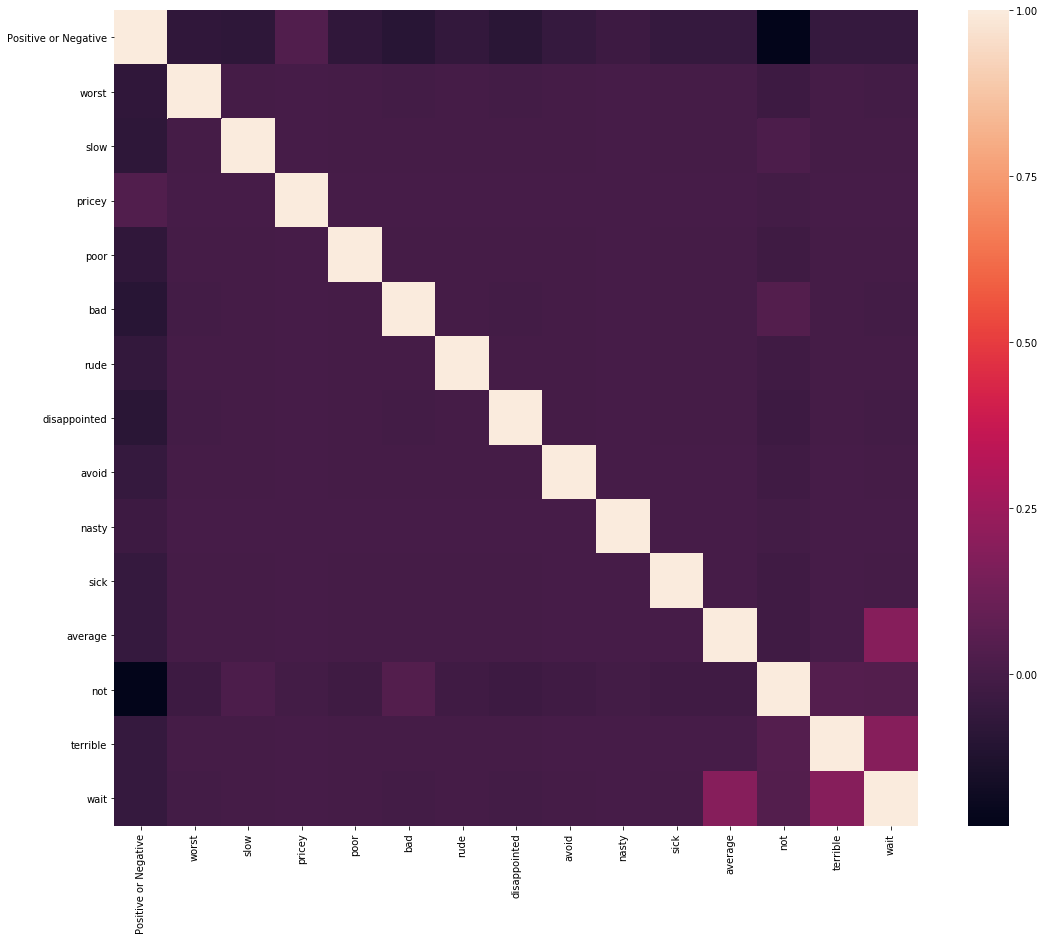

In [98]:
#Correlation matrix with sns.heatmap

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(18, 15))

sns.heatmap(yelp_raw.corr())
plt.show()

This matrix should be good enough. Ideally, we would want no correlation whatsoever. However, although there is some correlation across the board, there is none greater than 0.25 and that should still yield strong results.

In [99]:
#Before we actually run the model we have to build out our training data. Specify an outcome (y or dependent variable) and 
#the inputs (x or independent variables). We'll do that below under the variables data and target

data = yelp_raw[keywords]
target = yelp_raw['Positive or Negative']

In [100]:
#Since data is binary / boolean, need to import the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
NB_Model = BernoulliNB()

# Fit our model to the data.
NB_Model.fit(data, target)

# Classify, storing the result in a new variable.
positive_predictor = NB_Model.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != positive_predictor).sum()))

Number of mislabeled points out of a total 1000 points : 382


In [105]:
#Confusion matrix to better understand results

from sklearn.metrics import confusion_matrix
confusion_matrix(target, positive_predictor)

array([[137, 363],
       [ 19, 481]])

Top row signifies correctly classifying positive reviews
Bottom row signifies correctly classifying negative reviews

**Sensitivity** is the percentage of positives correctly identified, in our case 137/500 or 27.4%. This shows how good we are at catching positives, or how sensitive our model is to identifying positives.

**Specificity** is just the opposite, the percentage of negatives correctly identified, 481/500 or 96.2%.

Type 1 Error: False Positive (false alarm) - 363
Type 2 Error: False Negative (miss) - 19

**Original Attempt:** Originally I wanted to go with positive adjectives and this was yielding approximately 500 out of 1000 as mislabeled. I was finding that even though 'good' or 'great' may seem like good keywords, they were being preceded by 'not'. 

**Second Attempt:** Decided to try and classify using negative keywords and this was far more successful. Tweaked my keywords until I found the best combination.

In [101]:
#Try the same model on another dataset - IMDB

imdb_raw = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
imdb_raw.columns = ['Review', 'Positive or Negative']

In [102]:
#Use same as before
#Create keywords list to form the basis of our Naive Bayes Classifier

keywords = ['worst', 'slow', 'pricey', 'poor', 'bad', 'rude', 'disappointed', 
            'avoid', 'nasty', 'sick', 'average', 'not', 'terrible', 'wait']

for key in keywords:
    imdb_raw[str(key)] = imdb_raw.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False)

In [103]:
#Setup data and target

data_imdb = imdb_raw[keywords]
target_imdb = imdb_raw['Positive or Negative']

In [104]:
# Instantiate our model and store it in a new variable.
NB_Model_imdb = BernoulliNB()

# Fit our model to the data.
NB_Model_imdb.fit(data_imdb, target_imdb)

# Classify, storing the result in a new variable.
positive_predictor_imdb = NB_Model_imdb.predict(data_imdb)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_imdb.shape[0],
    (target_imdb != positive_predictor_imdb).sum()))

Number of mislabeled points out of a total 748 points : 299


**Takeaway:** Did not perform as well as it did with the Yelp review data. This makes sense as some of the adjectives in my previous model were more closely related to food than to movies.